In [19]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import mnist

In [20]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

In [21]:
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [22]:
from keras.utils import np_utils
from keras.optimizers import SGD

# Loading Data

In [23]:
#Load the training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Very Important:

When dealing with images & convolutions, it is paramount to handle image_data_format properly

In [24]:
from keras import backend as K

In [25]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
    
print(shape_ord)

(28, 28, 1)


# Preprocess and Normalise Data

In [26]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [27]:
# Reshaping the appended data to appropraite form
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

In [28]:
# Converting the classes to its binary categorical form
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [29]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


# A simple CNN

In [30]:
# -- Initializing the values for the convolution neural network

nb_epoch = 5  # kept very low! Please increase if you have GPU

batch_size = 64
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

# Vanilla SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Step 1: Model Definition

In [31]:
model = Sequential()

model.add(Conv2D(nb_filters, (nb_conv, nb_conv), padding='valid', 
                 input_shape=shape_ord))  # note: the very first layer **must** always specify the input_shape
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                54090     
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


# Step 2: Compile

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Step 3: Fit

In [34]:
hist = model.fit(X_train, Y_train, batch_size=batch_size, 
                 epochs=nb_epoch, verbose=1, 
                 validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 296us/step - loss: 0.1541 - acc: 0.9542 - val_loss: 0.0688 - val_acc: 0.9780
Epoch 2/5
60000/60000 [==============================] - 18s 297us/step - loss: 0.0626 - acc: 0.9810 - val_loss: 0.0616 - val_acc: 0.9809
Epoch 3/5
60000/60000 [==============================] - 18s 294us/step - loss: 0.0478 - acc: 0.9845 - val_loss: 0.0523 - val_acc: 0.9834
Epoch 4/5
60000/60000 [==============================] - 18s 299us/step - loss: 0.0372 - acc: 0.9885 - val_loss: 0.0610 - val_acc: 0.9807
Epoch 5/5
60000/60000 [==============================] - 18s 299us/step - loss: 0.0289 - acc: 0.9906 - val_loss: 0.0574 - val_acc: 0.9816


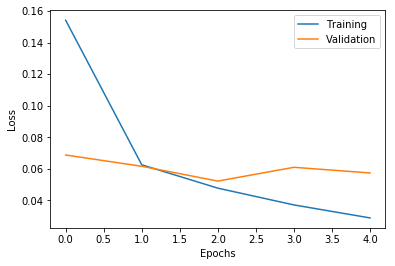

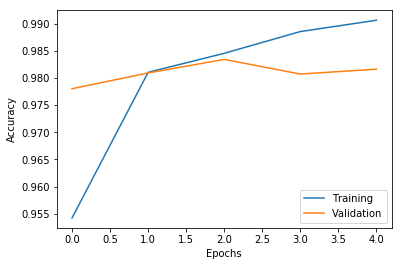

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['Training', 'Validation'], loc='lower right')

https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d